PART 03 R 분석

> CHAPTER 03 제2유형: 데이터 분석
> >SECTION 02 지도학습-분류
> > >**01 의사결정나무를 이용한 분류 문제 해결**

In [2]:
library(dplyr)        # dplyr 패키지 임포트
library(ggplot2)      # ggplot2 패키지 임포트

# 의사결정나무 분류모델을 위한 패키지 임포트
library(class)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# 깃허브에 공개되어 있는 csv 파일을 읽어와서 데이터프레임 df로 넣는다.
df <- read.csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv", stringsAsFactors=TRUE)

In [4]:
df

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S


In [5]:
summary(df)

  PassengerId       Survived          Pclass     
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446.0   Median :0.0000   Median :3.000  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309  
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000  
                                                 
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:314   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.12  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.70  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :885                NA's   :177    
     Sib

In [6]:
# Age 컬럼의 결측값을 평균으로 대치한다.
d_mean = mean(df$Age, na.rm=TRUE)                 # 결측치를 제외한 평균
df$Age = ifelse(is.na(df$Age), d_mean, df$Age)    # 평균으로 대치

# Embarked 컬럼의 결측값을 최빈값 S로 대치한다.
df$Embarked = replace(df$Embarked, df$Embarked == "", "S")

In [7]:
# Sex 컬럼은 레이블 인코딩을 수행
# male: 1, female: 2
df$Sex <- as.numeric(factor(df$Sex), level=c("male","female"))

# Embarked 컬럼은 레이블 인코딩을 수행
# C: 1, Q: 2, S: 3
df$Embarked <- as.numeric(factor(df$Embarked), level=c("C","Q","S"))
str(df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : num  2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : num  3 1 3 3 3 2 3 3 3 1 ...


In [8]:
# Family_size 변수 생성, SibSp + Parch
df$FamilySize <- df$SibSp + df$Parch

In [9]:
# 분석 결과에 영향이 없는 변수는 제외하고, 나머지 변수로 데이터셋 재구성
# PassengerId, Name, Ticket, Cabin 제외
df <- df[ , c("Survived", "Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize")]
df

Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,3,2,22.00000,7.2500,3,1
1,1,1,38.00000,71.2833,1,1
1,3,1,26.00000,7.9250,3,0
1,1,1,35.00000,53.1000,3,1
0,3,2,35.00000,8.0500,3,0
0,3,2,29.69912,8.4583,2,0
0,1,2,54.00000,51.8625,3,0
0,3,2,2.00000,21.0750,3,4
1,3,1,27.00000,11.1333,3,2


In [10]:
# 난수(random) 발생을 위한 seed 값 부여
set.seed(123)

# 전체 행의 80%에 해당하는 인덱스를 임의 선정
idx <- sample(1:nrow(df), 0.8*nrow(df))

# 인덱스에 해당하는 행을 학습 데이터로 선정
df_train <- df[idx, ]       # 독립변수 + 종속변수

# 인덱스에 해당하지 않는 행(-idx)을 테스트 데이터로 선정
df_test <- df[-idx, ]       # 독립변수 + 종속변수

In [11]:
print(dim(df_train))    # 학습 데이터셋
print(dim(df_test))     # 테스트 데이터셋

[1] 712   7
[1] 179   7


In [13]:
# rpart()를 사용하여 의사결정나무 학습
library(rpart)      # rpart() 함수 포함 패키지

model <- rpart(Survived~., method="class", data=df_train)

In [14]:
# 학습된 모델을 기반으로 예측 수행
pred <- predict(model, df_test[,-1], type="class")

In [15]:
# 예측 결과와 실제값을 비교(오차행렬)
cm <- table(df_test$Survived, pred)
print(cm)

# 모델평가 - 정확도
acc <- (cm[1,1] + cm[2,2])/nrow(df_test)
print(acc)

   pred
     0  1
  0 95 15
  1 20 49
[1] 0.8044693


In [16]:
# 모델 복잡도(cp) 출력
printcp(model)


Classification tree:
rpart(formula = Survived ~ ., data = df_train, method = "class")

Variables actually used in tree construction:
[1] Age    Fare   Pclass Sex   

Root node error: 273/712 = 0.38343

n= 712 

        CP nsplit rel error  xerror     xstd
1 0.450549      0   1.00000 1.00000 0.047524
2 0.032967      1   0.54945 0.54945 0.039858
3 0.025641      3   0.48352 0.52747 0.039260
4 0.014652      4   0.45788 0.49451 0.038314
5 0.010000      6   0.42857 0.50183 0.038529



Classification tree:
rpart(formula = Survived ~ ., data = df_train, method = "class")

Variables actually used in tree construction:
[1] Age    Fare   Pclass Sex   

Root node error: 273/712 = 0.38343

n= 712 

        CP nsplit rel error  xerror     xstd
1 0.450549      0   1.00000 1.00000 0.047524
2 0.032967      1   0.54945 0.54945 0.039858
3 0.025641      3   0.48352 0.52747 0.039260
4 0.015000      4   0.45788 0.49451 0.038314


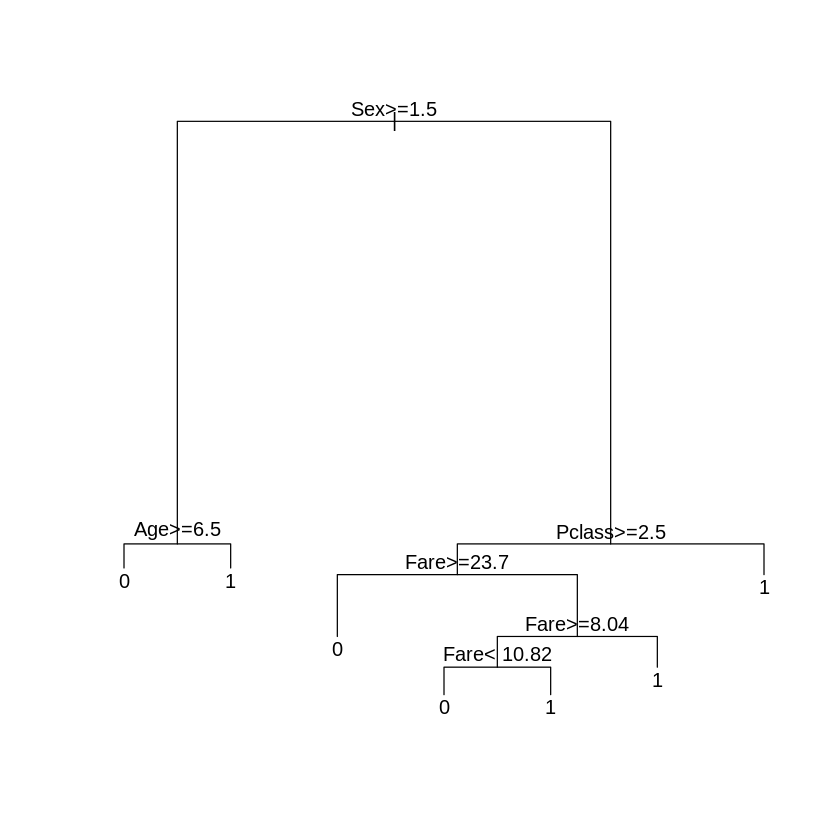

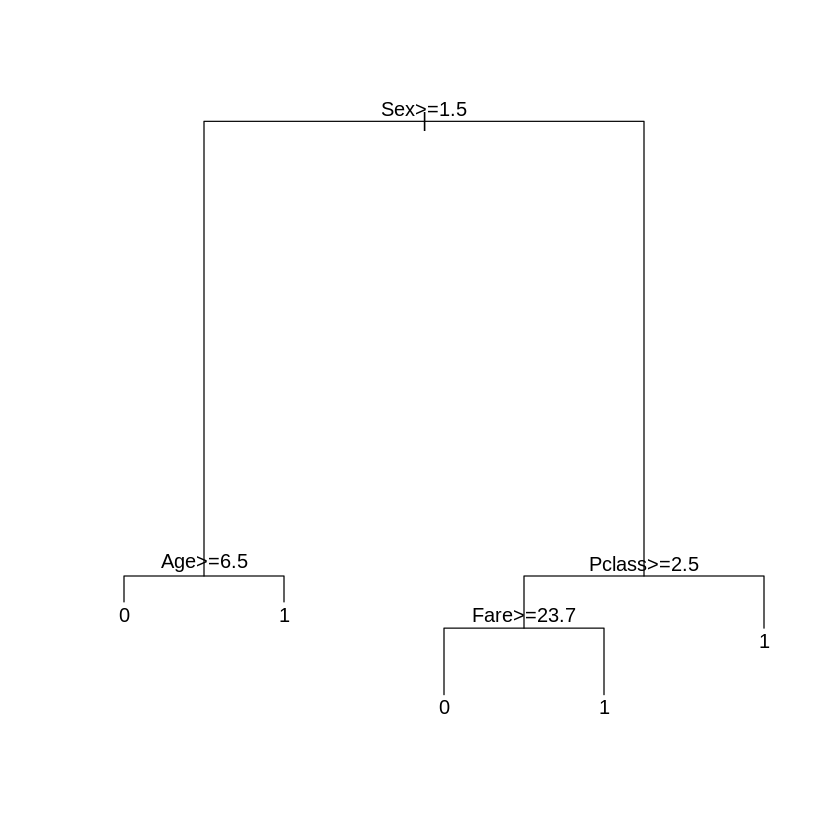

In [17]:
# 의사결정나무 가지치기(최적화)
# 최적의 CP값보다 조금 큰 값으로 설정
model_opt <- prune(model, cp=0.015)
printcp(model_opt)

# 의사결정나무 시각화
plot(model); text(model);
plot(model_opt); text(model_opt);

>>>**02 KNN을 이용한 분류 문제 해결**

In [19]:
library(dplyr)        # dplyr 패키지 임포트
library(ggplot2)      # ggplot2 패키지 임포트

# KNN 분류모델을 위한 패키지 임포트
library(class)

In [20]:
# 깃허브에 있는 csv 파일을 읽어와서 데이터프레임 df로 넣는다.
df <- read.csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

In [21]:
df

sepal_length,sepal_width,petal_length,petal_width,species
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


In [22]:
str(df)    # 데이터프레임 구조

'data.frame':	150 obs. of  5 variables:
 $ sepal_length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ sepal_width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ petal_length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ petal_width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ species     : chr  "setosa" "setosa" "setosa" "setosa" ...


In [23]:
summary(df)       # 데이터프레임의 기술통계 보여주기

  sepal_length    sepal_width     petal_length    petal_width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
   species         
 Length:150        
 Class :character  
 Mode  :character  
                   
                   
                   

In [24]:
sum(is.na(df))      # 결측치 개수를 출력

[1] 0

In [25]:
table(df$species)


    setosa versicolor  virginica 
        50         50         50 

In [26]:
# Min-Max 정규화 함수 정의
normal <- function(x) (
    return ((x-min(x))/(max(x)-min(x)))
)

# 정규화 함수 적용
df[1:4] <- as.data.frame(lapply(df[1:4], normal))
summary(df)

  sepal_length     sepal_width      petal_length     petal_width     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.2222   1st Qu.:0.3333   1st Qu.:0.1017   1st Qu.:0.08333  
 Median :0.4167   Median :0.4167   Median :0.5678   Median :0.50000  
 Mean   :0.4287   Mean   :0.4406   Mean   :0.4675   Mean   :0.45806  
 3rd Qu.:0.5833   3rd Qu.:0.5417   3rd Qu.:0.6949   3rd Qu.:0.70833  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.00000  
   species         
 Length:150        
 Class :character  
 Mode  :character  
                   
                   
                   

In [27]:
# 난수(random) 발생을 위한 seed 값 부여
set.seed(123)

# 행개수(150개)의 80%인 120개를 행 인덱스를 임의 선정
idx <-sample(1:nrow(df),0.8*nrow(df))

# 인덱스에 해당하는 행을 학습 데이터로 선정
X_train <- df[idx, 1:4]     # 독립변수
y_train <- df[idx, 5]       # 종속변수(목표변수)

# 인덱스에 해당하지 않는 행(-idx)을 테스트 데이터로 선정
X_test <- df[-idx, 1:4]     # 독립변수
y_test <- df[-idx, 5]       # 종속변수(목표변수)

In [28]:
print(dim(X_train))     # 학습 데이터(독립변수)
print(dim(X_test))      # 테스트 데이터(독립변수)
print(dim(data.frame(y_train)))   # 학습 데이터(종속변수)
print(dim(data.frame(y_test)))    # 테스트 데이터(종속변수)

[1] 120   4
[1] 30  4
[1] 120   1
[1] 30  1


In [29]:
# KNN 모델 학습
# 독립변수 X_train, 종속변수 y_train으로 학습
# X_test로 분류한 결과를 model에 저장
model <- knn(train=X_train, test=X_test, cl=y_train, k=3)

# 분류결과 출력
table(factor(model))


    setosa versicolor  virginica 
        10         14          6 

In [30]:
# 모델 평가 - 오차행렬
c_mat <- table(y_test,model)
c_mat

# 모델평가 - 정확도
acc <- (c_mat[1,1] + c_mat[2,2] + c_mat[3,3])/nrow(X_test)
acc

            model
y_test       setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         14         1
  virginica       0          0         5

[1] 0.9666667

>>>**03 SVM을 이용한 분류 문제 해결**

In [32]:
library(dplyr)    # dplyr 패키지 임포트
library(ggplot2)  # ggplot2 패키지 임포트

# SVM 분류모델을 위한 패키지 설치와 임포트
install.packages("e1071")
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [33]:
# 깃허브에 있는 csv 파일을 읽어와서 데이터프레임 df로 넣는다.
df = read.csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv", stringsAsFactors=TRUE)

In [34]:
# Age 컬럼의 결측값을 평균으로 대치한다.
d_mean = mean(df$Age, na.rm=TRUE)                   # 결측치를 제외한 평균
df$Age = ifelse(is.na(df$Age), d_mean, df$Age)      # 평균으로 대치

# Embarked 컬럼의 결측값을 최빈값 S로 대치한다.
df$Embarked = replace(df$Embarked, df$Embarked=="", "S")

# FamilySize 변수 생성, SibSp + Parch
df$FamilySize <- df$SibSp + df$Parch

In [36]:
# Sex 컬럼은 원-핫 인코딩을 수행
df <- mutate(df, Male = ifelse(df$Sex=="male", 1, 0))
df <- mutate(df, Female = ifelse(df$Sex=="female", 1, 0))

# Embarked 컬럼은 원-핫 인코딩을 수행
df <- mutate(df, C = ifelse(df$Embarked=="C", 1, 0))
df <- mutate(df, Q = ifelse(df$Embarked=="Q", 1, 0))
df <- mutate(df, S = ifelse(df$Embarked=="S", 1, 0))

In [37]:
df

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Male,Female,C,Q,S
<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,,S,1,1,0,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00000,1,0,PC 17599,71.2833,C85,C,1,0,1,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,,S,0,0,1,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S,1,0,1,0,0,1
5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,,S,0,1,0,0,0,1
6,0,3,"Moran, Mr. James",male,29.69912,0,0,330877,8.4583,,Q,0,1,0,0,1,0
7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E46,S,0,1,0,0,0,1
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,,S,4,1,0,0,0,1
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,,S,2,0,1,0,0,1


In [38]:
# 분석 결과에 영향이 없는 변수는 제외하고, 나머지 변수로 데이터셋 재구성
# PassengerId, Name, Ticket, Cabin 제외
# Sex 대신 Male, Female 선택, Embarked 대신 C, Q, S 선택
df <- df[ , c("Survived", "Pclass", "Male", "Female", "Age", "Fare", "C", "Q", "S", "FamilySize")]

In [39]:
# 난수(random) 발생을 위한 seed 값 부여
set.seed(123)

# 전체 행의 70%에 해당하는 인덱스를 임의 선정
idx <-sample(1:nrow(df), 0.7*nrow(df))

# 인덱스에 해당하는 행을 학습 데이터로 선정
df_train <- df[idx, ]     # 독립변수 + 종속변수

# 인덱스에 해당하지 않는 행(-idx)을 테스트 데이터로 선정
df_test <- df[-idx, ]     # 독립변수 + 종속변수
print(dim(df_train))      # 학습 데이터셋
print(dim(df_test))       # 테스트 데이터셋

[1] 623  10
[1] 268  10


In [40]:
# SVM 모델 학습
model <- svm(Survived~., data=df_train, type="C-classification")

In [41]:
# 학습된 모델을 기반으로 예측 수행
pred <- predict(model, df_test, type="class")

In [42]:
# Confusion Matrix 작성
cm <- table(df_test$Survived, pred)
print(cm)

# 모델평가 - 정확도
acc <- (cm[1,1] + cm[2,2])/nrow(df_test)
print(acc)

   pred
      0   1
  0 148  20
  1  30  70
[1] 0.8134328


>>>**04 로지스틱 회귀를 이용한 분류 문제 해결**

In [43]:
library(dplyr)        # dplyr 패키지 임포트
library(ggplot2)      # ggplot2 패키지 임포트

# 로지스틱 회귀 분류모델을 위한 패키지 임포트
library(nnet)

In [44]:
# 깃허브에 있는 csv 파일을 읽어와서 데이터프레임 df로 넣는다.
df <- read.csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

In [45]:
str(df)  # 데이터프레임 구조

'data.frame':	150 obs. of  5 variables:
 $ sepal_length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ sepal_width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ petal_length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ petal_width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ species     : chr  "setosa" "setosa" "setosa" "setosa" ...


In [46]:
summary(df)

  sepal_length    sepal_width     petal_length    petal_width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
   species         
 Length:150        
 Class :character  
 Mode  :character  
                   
                   
                   

In [47]:
sum(is.na(df))      # 결측치 개수를 출력

[1] 0

In [48]:
table(df$species)


    setosa versicolor  virginica 
        50         50         50 

In [49]:
# Min-Max 정규화 함수 정의
normal <- function(x) (
    return ((x - min(x))/(max(x) - min(x)))
)
# 정규화 함수 적용
df[1:4] <- as.data.frame(lapply(df[1:4], normal))
summary(df)

  sepal_length     sepal_width      petal_length     petal_width     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.2222   1st Qu.:0.3333   1st Qu.:0.1017   1st Qu.:0.08333  
 Median :0.4167   Median :0.4167   Median :0.5678   Median :0.50000  
 Mean   :0.4287   Mean   :0.4406   Mean   :0.4675   Mean   :0.45806  
 3rd Qu.:0.5833   3rd Qu.:0.5417   3rd Qu.:0.6949   3rd Qu.:0.70833  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.00000  
   species         
 Length:150        
 Class :character  
 Mode  :character  
                   
                   
                   

In [50]:
# 난수(random) 발생을 위한 seed 값 부여
set.seed(123)

# 150개 행의 80%인 120개 행 인덱스를 임의 선정
idx <- sample(1:nrow(df), 0.8*nrow(df))

# 인덱스에 해당하는 행을 학습 데이터로 선정
train_dataset <- df[idx, 1:5]

# 인덱스에 해당하지 않는 행(-idx)을 테스트 데이터로 선정
test_dataset <- df[-idx, 1:5]

In [51]:
print(dim(train_dataset))     # 학습 데이터
print(dim(test_dataset))      # 테스트 데이터

[1] 120   5
[1] 30  5


In [52]:
# 로지스틱 회귀 모델 학습
# 독립변수 X_train, 종속변수 y_train으로 학습
model <- multinom(formula = species ~ sepal_length + sepal_width + petal_length + petal_width, data = train_dataset)
fitted(model)

# weights:  18 (10 variable)
initial  value 131.833475 
iter  10 value 13.518787
iter  20 value 4.708637
iter  30 value 3.368639
iter  40 value 2.934471
iter  50 value 2.692612
iter  60 value 2.619843
iter  70 value 2.404755
iter  80 value 2.368683
iter  90 value 2.253571
iter 100 value 2.206298
final  value 2.206298 
stopped after 100 iterations


,setosa,versicolor,virginica
14,1.000000e+00,3.281873e-08,1.587809e-52
50,9.999973e-01,2.735069e-06,7.801278e-51
118,9.626793e-24,1.199338e-12,1.000000e+00
43,1.000000e+00,1.915765e-08,2.856899e-51
150,2.488589e-10,2.447711e-04,9.997552e-01
148,1.067095e-14,4.308072e-05,9.999569e-01
90,1.027061e-05,9.999897e-01,2.676168e-08
91,1.493468e-04,9.998464e-01,4.229918e-06
143,9.162982e-15,3.665186e-07,9.999996e-01
92,5.476620e-06,9.999924e-01,2.149935e-06


In [53]:
# 모델 평가 - 오차행렬
result <- predict(model, newdata = test_dataset, type = "class")
correct_model <- sum(result == test_dataset$species) / nrow(test_dataset)
c_mat <- xtabs(~ result + test_dataset$species)
c_mat

# 모델평가 - 정확도
acc <- (c_mat[1,1] + c_mat[2,2] + c_mat[3,3]) / nrow(test_dataset)
acc

            test_dataset$species
result       setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         14         0
  virginica       0          1         5

[1] 0.9666667

>>>**05 랜덤 포레스트를 이용한 분류 문제 해결**

In [54]:
library(dplyr) # dplyr 패키지 임포트
library(ggplot2) # ggplot2 패키지 임포트

# 랜덤 포레스트 분류모델을 위한 패키지 임포트
install.packages("randomForest")
library(randomForest)       # randomForest() 함수 포함 패키지

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine




In [55]:
# 깃허브에 공개되어 있는 csv 파일을 읽어와서 데이터프레임 df로 넣는다.
df = read.csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv", stringsAsFactors=TRUE)

In [56]:
summary(df)     # 데이터프레임의 기술통계 및 결측치 확인

  PassengerId       Survived          Pclass     
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446.0   Median :0.0000   Median :3.000  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309  
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000  
                                                 
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:314   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.12  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.70  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :885                NA's   :177    
     Sib

In [57]:
# Age 컬럼의 결측값을 평균으로 대치한다.
d_mean = mean(df$Age, na.rm=TRUE)                 # 결측치를 제외한 평균
df$Age = ifelse(is.na(df$Age), d_mean, df$Age)    # 평균으로 대치

# Embarked 컬럼의 결측값을 최빈값 S로 대치한다.
df$Embarked = replace(df$Embarked, df$Embarked=="", "S")

In [59]:
# Sex 컬럼은 레이블 인코딩을 수행
# male: 1, female: 2
df$Sex <- as.numeric(factor(df$Sex), level=c("male", "female"))

# Embarked 컬럼은 레이블 인코딩을 수행
# C: 1, Q: 2, S: 3
df$Embarked <- as.numeric(factor(df$Embarked), level=c("C","Q","S"))

In [60]:
str(df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : num  2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : num  3 1 3 3 3 2 3 3 3 1 ...


In [61]:
# Family_size 변수 생성, SibSp + Parch
df$FamilySize <- df$SibSp + df$Parch
df

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<dbl>,<int>
1,0,3,"Braund, Mr. Owen Harris",2,22.00000,1,0,A/5 21171,7.2500,,3,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,38.00000,1,0,PC 17599,71.2833,C85,1,1
3,1,3,"Heikkinen, Miss. Laina",1,26.00000,0,0,STON/O2. 3101282,7.9250,,3,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.00000,1,0,113803,53.1000,C123,3,1
5,0,3,"Allen, Mr. William Henry",2,35.00000,0,0,373450,8.0500,,3,0
6,0,3,"Moran, Mr. James",2,29.69912,0,0,330877,8.4583,,2,0
7,0,1,"McCarthy, Mr. Timothy J",2,54.00000,0,0,17463,51.8625,E46,3,0
8,0,3,"Palsson, Master. Gosta Leonard",2,2.00000,3,1,349909,21.0750,,3,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.00000,0,2,347742,11.1333,,3,2


In [62]:
# 분석 결과에 영향이 없는 변수는 제외하고, 나머지 변수로 데이터셋 재구성
# PassengerId, Name, Ticket, Cabin 제외
df <- df[ , c("Survived", "Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize")]
df

Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,3,2,22.00000,7.2500,3,1
1,1,1,38.00000,71.2833,1,1
1,3,1,26.00000,7.9250,3,0
1,1,1,35.00000,53.1000,3,1
0,3,2,35.00000,8.0500,3,0
0,3,2,29.69912,8.4583,2,0
0,1,2,54.00000,51.8625,3,0
0,3,2,2.00000,21.0750,3,4
1,3,1,27.00000,11.1333,3,2


In [63]:
# 난수(random) 발생을 위한 seed 값 부여
set.seed(123)

# 전체 행의 80%에 해당하는 인덱스를 임의 선정
idx <- sample(1:nrow(df), 0.8*nrow(df))

# 인덱스에 해당하는 행을 학습 데이터로 선정
df_train <- df[idx, ]       # 독립변수 + 종속변수

# 인덱스에 해당하지 않는 행(-idx)을 테스트 데이터로 선정
df_test <- df[-idx, ]       # 독립변수 + 종속변수

In [64]:
print(dim(df_train))     # 학습 데이터셋
print(dim(df_test))      # 테스트 데이터셋

[1] 712   7
[1] 179   7


In [65]:
# randomForest()를 사용하여 랜덤 포레스트 학습
df_train$Survived <- as.factor(df_train$Survived)
model <- randomForest(Survived~., data=df_train)

In [66]:
# 학습된 모델을 기반으로 예측 수행
pred <- predict(model, newdata=df_test, type="class")

In [67]:
# 예측 결과와 실제값을 비교(오차행렬)
cm <- table(df_test$Survived, pred)
print(cm)

# 모델평가 - 정확도
acc <- (cm[1,1] + cm[2,2])/nrow(df_test)
print(acc)

   pred
     0  1
  0 99 11
  1 19 50
[1] 0.8324022
